# Setup

In [7]:
from scipy.constants import *
from  operator import *
from math import *
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Data

In [2]:
# Distances (measured in meters)
d = [i / 1000 for i in [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40 ]]

# 1st experiment - 10 volts
v1 = [ 10, 15, 20, 22, 24, 25, 26, 27, 27.5, 28, 30, 31, 32, 32.5 ]

# 2nd experiment - 15 volts
v2 = [ 15, 20, 25, 28, 30, 31, 32.5, 34, 35, 36, 37.5, 39, 39.5, 40 ]

# 3rd experiment - 20 volts
v3 = [ 20, 30, 40, 45, 47.5, 50, 52.5, 54.5, 56, 57.5, 59, 60, 60, 61 ]

df = pd.DataFrame({'distance': d, 'voltage1': v1, 'voltage2': v2, 'voltage3': v3})

df

,distance,voltage1,voltage2,voltage3
0,0.001,10.0,15.0,20.0
1,0.002,15.0,20.0,30.0
2,0.003,20.0,25.0,40.0
3,0.004,22.0,28.0,45.0
4,0.005,24.0,30.0,47.5
5,0.006,25.0,31.0,50.0
6,0.007,26.0,32.5,52.5
7,0.008,27.0,34.0,54.5
8,0.009,27.5,35.0,56.0
9,0.010,28.0,36.0,57.5


# Scatterplots

[Text(0.5, 0, 'Distance [m]'), Text(0, 0.5, 'Voltage [V]')]

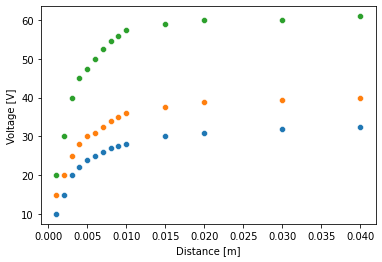

In [3]:
ax = sns.scatterplot(x='distance', y='voltage1', data=df)
sns.scatterplot(x='distance', y='voltage2', data=df)
sns.scatterplot(x='distance', y='voltage3', data=df)

ax.set(xlabel='Distance [m]', ylabel='Voltage [V]')


# Lineplots

[Text(0.5, 0, 'Distance [m]'), Text(0, 0.5, 'Voltage [V]')]

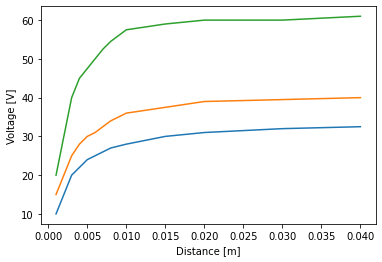

In [4]:
ax = sns.lineplot(x='distance', y='voltage1', data=df)
sns.lineplot(x='distance', y='voltage2', data=df)
sns.lineplot(x='distance', y='voltage3', data=df)

ax.set(xlabel='Distance [m]', ylabel='Voltage [V]')

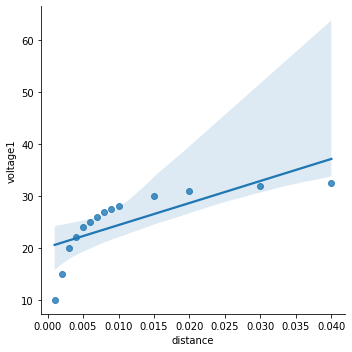

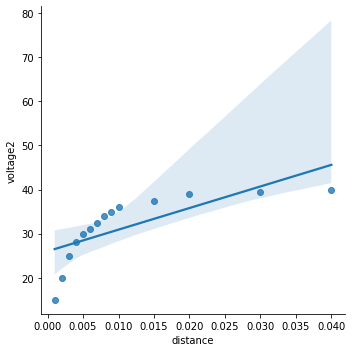

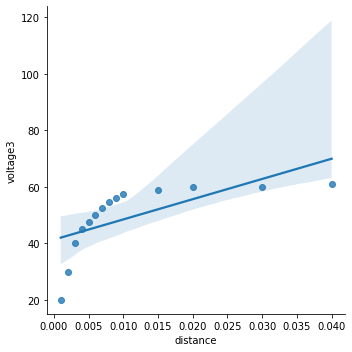

In [5]:
sns.lmplot(x="distance", y="voltage1", data=df)
sns.lmplot(x="distance", y="voltage2", data=df)
sns.lmplot(x="distance", y="voltage3", data=df)

In [32]:

# Apparatus
r = 0.1 
area = pi * r**2 

def analysis (d, v_exp):

    # Charge homogeneously distributed on the capacitor's plates
    # It remains constant thought all out measurements
    # Measured in Coulomb (C)
    q =  (epsilon_0 * area * v_exp[0]) / d[0]

    # Voltage under the hypothesis of an infinite parallel plane capacitor
    # Measured in Volt (V) 
    v_inf = [ ( q * i / (epsilon_0 * area) ) for i in d]

    # Capacitance under the hypothesis of an infinite parallel plane capacitor
    # This approximation works best for short distances
    # Measured in Farad (F)
    c_inf = [ ( q / i ) for i in v_inf]

    # Voltage along the axis of a flat disk
    # Measured in Volt (V) 
    v_disk = [ ( q * ( i + r - sqrt(r**2 + i**2)) / (epsilon_0 * area) ) for i in d]

    # Capacitance under the hypothesis of an finite circular parallel plate capacitor (disk)
    # Measured in Farad (F)
    c_disk = [ ( q / i ) for i in v_disk]

    # Total Capacitance of our capacitor 
    # It includes the parasitic capacitance from the voltmeter
    # Measured in Volt (V) 
    c_tot = [ (q / i) for i in v_exp] 

    # parasitic capacitance from the voltmeter
    c_par = map(sub, c_tot, c_disk)

    # Create Dataframe
    results = pd.DataFrame({ 'distance': d,'voltage-inf': v_inf, 'voltage-disk': v_disk, 'voltage-experimental': v_exp, 'capacitance_inf': c_inf, 'capacitance-disk': c_disk,'capacitance-total': c_tot,  'capacitance-parasitic': c_par })

    print(results)



analysis(df['distance'], df['voltage1'])

    distance  voltage-inf  voltage-disk  voltage-experimental  \
0      0.001         10.0      9.950001                  10.0   
1      0.002         20.0     19.800020                  15.0   
2      0.003         30.0     29.550101                  20.0   
3      0.004         40.0     39.200320                  22.0   
4      0.005         50.0     48.750780                  24.0   
5      0.006         60.0     58.201617                  25.0   
6      0.007         70.0     67.552994                  26.0   
7      0.008         80.0     76.805104                  27.0   
8      0.009         90.0     85.958168                  27.5   
9      0.010        100.0     95.012438                  28.0   
10     0.015        150.0    138.812579                  30.0   
11     0.020        200.0    180.196097                  31.0   
12     0.030        300.0    255.969349                  32.0   
13     0.040        400.0    322.967039                  32.5   

    capacitance_inf  cap